In [4]:
import mne as mne 

In [5]:
filePath = "dataset/h01.edf"
raw = mne.io.read_raw_edf(filePath, preload = True)
raw.set_montage('standard_1020')
raw.filter(0.5, 40, picks = 'eeg')
print(raw.n_times)

Extracting EDF parameters from C:\Users\pkuli\Desktop\schizophrenia-classification\Preprocessing\preprocessing_data_set_2\dataset\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (6.604 s)

231250


In [6]:
raw.resample(sfreq = 128) ## resampling

Measurement date,"June 23, 2003 16:14:37 GMT"
Experimenter,Unknown
Participant,DJZ
Digitized points,22 points
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,128.00 Hz
Highpass,0.50 Hz
Lowpass,40.00 Hz


In [7]:
print(raw.n_times)

118400


Using matplotlib as 2D backend.


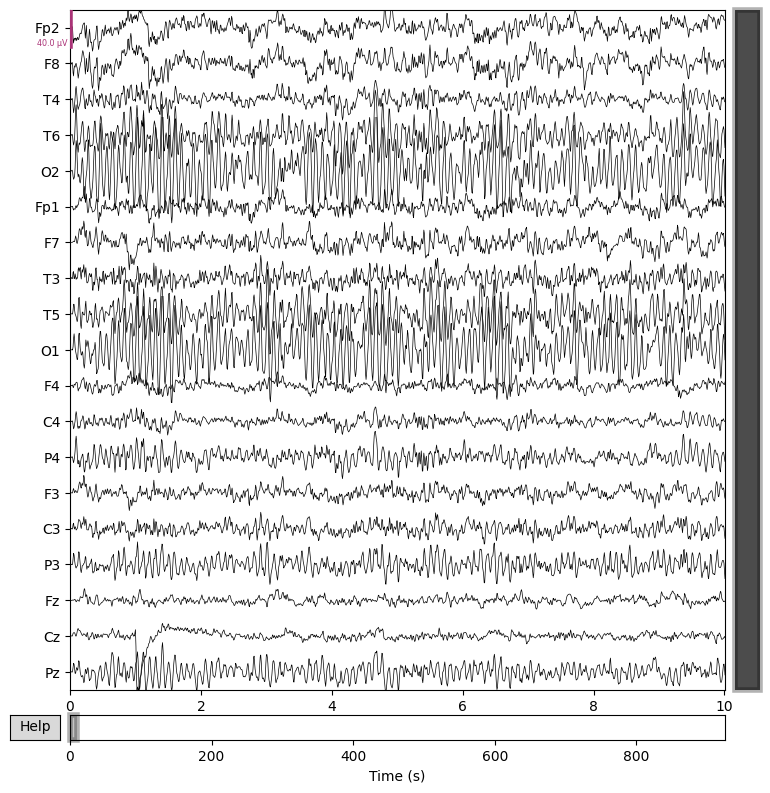

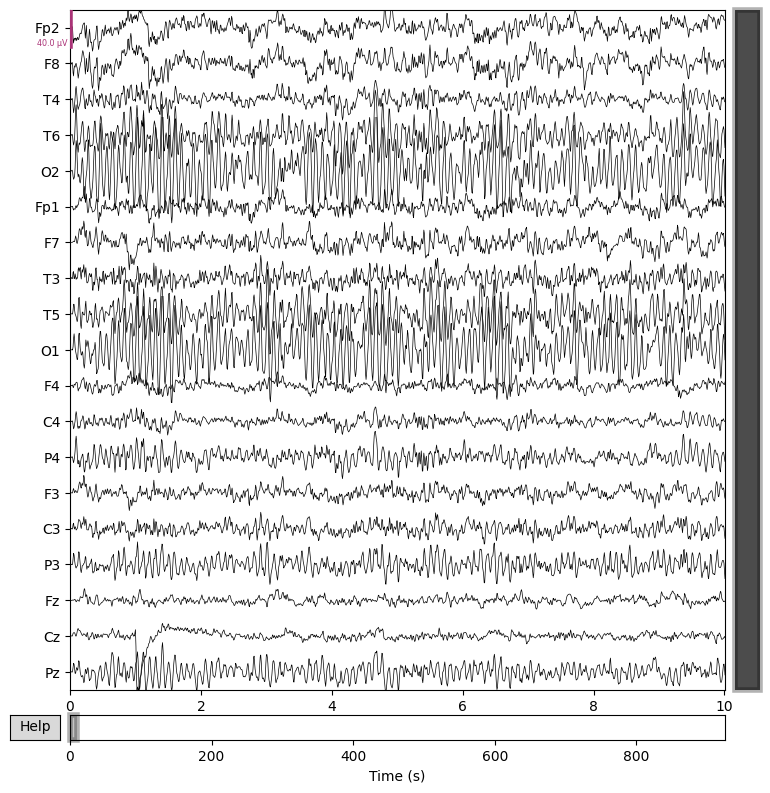

In [8]:
raw.plot()

In [9]:
epoch_length = 3.0
epochs = mne.make_fixed_length_epochs(raw, duration=epoch_length, preload=True) # division into 3 second pieces

Not setting metadata
308 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 308 events and 384 original time points ...
0 bad epochs dropped


In [10]:
channels_names = ['F8', 'O2', 'F7', 'O1', 'F4', 'C4', 'P4', 'F3', 'C3', 'P3', 'Cz', 'Pz']
data = epochs.get_data(picks = channels_names)
print(data.shape)

(308, 12, 384)


In [14]:
from scipy import signal
from scipy.signal import stft
from scipy.fft import fft, fftfreq
import tftb
from tftb.processing import MargenauHillDistribution
from tftb.generators import atoms
import matplotlib.pyplot as plt
import numpy as np


def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled


def convert_to_image(mh_distribution, flip=True):
    img = scale_minmax(mh_distribution, 0, 255).astype(np.uint8)
    if flip:
        img = np.flip(img, axis=0)
    img = 255 - img  # invert. make black==more energy
    return img


def margenau_hill_distribution_image(signal, extend=True):
    tfr_real = MargenauHillDistribution(signal)
    tfr_real.run()

    threshold = 0.05
    tfr_real.tfr = tfr_real.tfr[:(tfr_real.tfr.shape[0] // 2), :]
    _threshold = np.amax(tfr_real.tfr) * threshold
    tfr_real.tfr[tfr_real.tfr <= _threshold] = 0.0
    extent = (0, tfr_real.ts.max(), 0, 0.5)
    plt.imshow(tfr_real.tfr, aspect='auto', cmap='viridis', origin='lower', extent=extent)
    plt.show()
    image = convert_to_image(tfr_real.tfr, flip=False)
    plt.imshow(image, aspect='auto', cmap='gray', origin='lower', extent=extent)
    plt.show()

    if extend:
        return image, extent
    else:
        return image
    
def margenau_hill_distribution_log_image(signal, extend=True):
    tfr_real = MargenauHillDistribution(signal)
    tfr_real.run()
    
    # logarithmizing the results
    epsilon = 1e-10  # Small value to avoid log(0) problems
    tfr_real.tfr = np.log(tfr_real.tfr + epsilon)
    threshold = -20

    tfr_real.tfr = tfr_real.tfr[:(tfr_real.tfr.shape[0] // 2), :]
    _threshold = np.amax(tfr_real.tfr) * threshold
    tfr_real.tfr[tfr_real.tfr <= _threshold] = 0.0
    extent = (0, tfr_real.ts.max(), 0, 0.5)
    plt.imshow(tfr_real.tfr, aspect='auto', cmap='viridis', origin='lower', extent=extent)
    plt.show()
    image = convert_to_image(tfr_real.tfr, flip=False)
    plt.imshow(image, aspect='auto', cmap='gray', origin='lower', extent=extent)
    plt.show()

    if extend:
        return image, extent
    else:
        return image
    
    
def margenau_hill_distribution_log_normalized_image(signal, extend=True):
    tfr_real = MargenauHillDistribution(signal)
    tfr_real.run()
    
    # Normalize the results by dividing by the maximum value
    tfr_max = np.amax(tfr_real.tfr)
    tfr_real.tfr = tfr_real.tfr / tfr_max if tfr_max != 0 else tfr_real.tfr
    threshold = 0.05

    tfr_real.tfr = tfr_real.tfr[:(tfr_real.tfr.shape[0] // 2), :]
    _threshold = np.amax(tfr_real.tfr) * threshold
    tfr_real.tfr[tfr_real.tfr <= _threshold] = 0.0
    extent = (0, tfr_real.ts.max(), 0, 0.5)
    plt.imshow(tfr_real.tfr, aspect='auto', cmap='viridis', origin='lower', extent=extent)
    plt.show()
    image = convert_to_image(tfr_real.tfr, flip=False)
    plt.imshow(image, aspect='auto', cmap='gray', origin='lower', extent=extent)
    plt.show()

    if extend:
        return image, extent
    else:
        return image

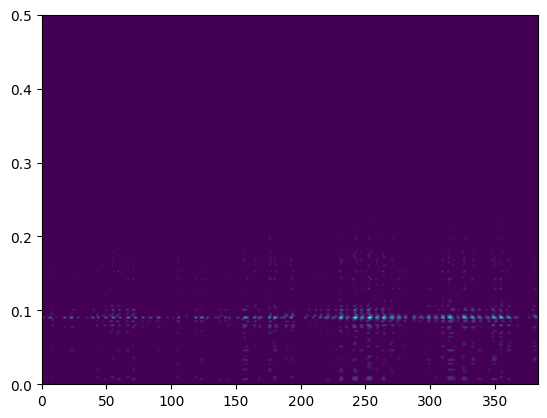

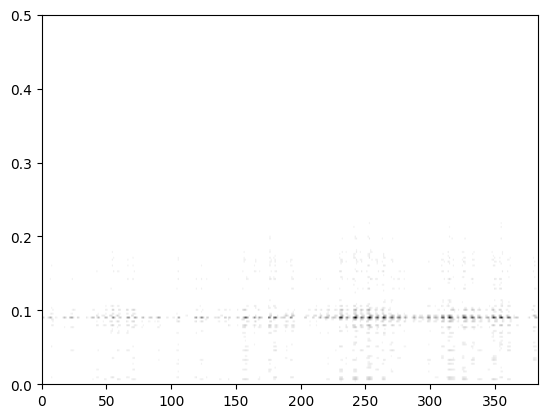

In [15]:
image = margenau_hill_distribution_image(data[100][1])

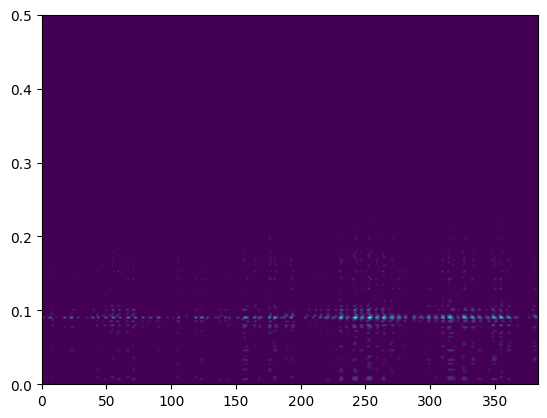

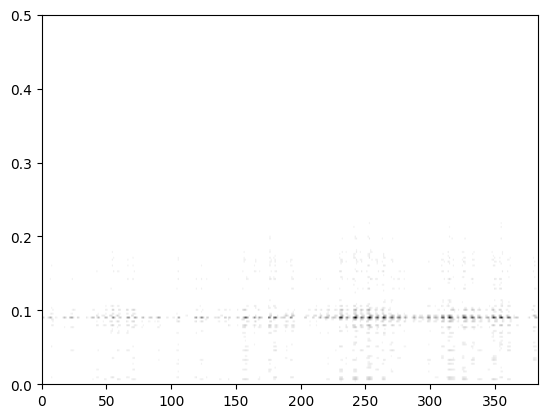

In [16]:
image2 = margenau_hill_distribution_log_normalized_image(data[100][1])

C:\Users\pkuli\AppData\Local\Temp\ipykernel_17116\1302058072.py:51: RuntimeWarning: invalid value encountered in log
  tfr_real.tfr = np.log(tfr_real.tfr + epsilon)


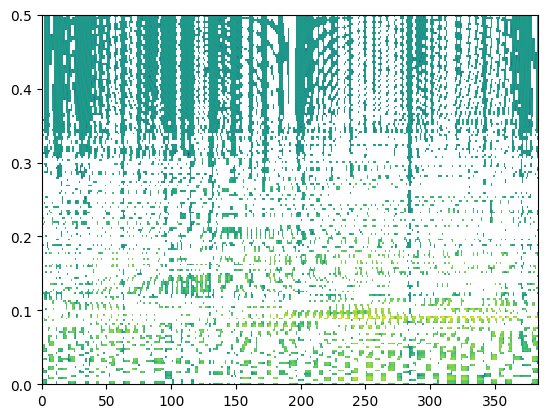

C:\Users\pkuli\AppData\Local\Temp\ipykernel_17116\1302058072.py:18: RuntimeWarning: invalid value encountered in cast
  img = scale_minmax(mh_distribution, 0, 255).astype(np.uint8)


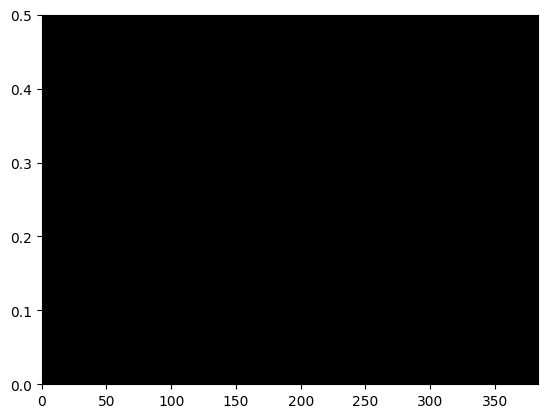

In [17]:
image3 = margenau_hill_distribution_log_image(data[100][1])